##  Section 3. Gradient Descent 방법

## 문제 1 Gradient Descent을 활용한 Linear Regression

* **Gradient Descent**을 이용해 아래 데이터를 linear regression 해주세요. <br>

###  Gradient Descent

1. 우선 가중치(w)을 초기화 합니다.  (w1,  w0) <br>
정규 분포(mean = 0.0, stddev=0.1) 을 이용합니다  

2. $ \frac{\partial  loss }{ \partial w0} $, $ \frac{\partial  loss }{ \partial w1} $ 을 구합니다. 

3. Loss 을 구합니다. <br>
$Loss = \frac{1}{2N}* {\sum^N_{i=1} (y_{pred} - y_{true})^2}$ <br>

4. gradient Descent 을 구현합니다. 

 $ \hat{w} = w - \alpha * \frac{\partial  loss }{ \partial w}$<br>  수식을 이용해 $w$ 을 수정합니다. 적절한  learning rate($\alpha$)을 설정해주세요! 
 
5. 5번 과정을 Loss 가 더 줄어들지 않을 때까지 실행합니다. 

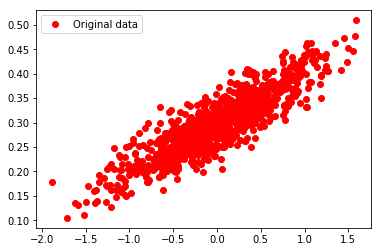

In [0]:
# 아래 코드를 실행해 주세요 
from sklearn.datasets import load_iris
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

num_points = 1000
vectors_set = []
for i in range(num_points):
    x1= np.random.normal(0.0, 0.55)
    y1= x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

xs = np.asarray([v[0] for v in vectors_set])
ys = np.asarray([v[1] for v in vectors_set])

plt.plot(xs, ys, 'ro', label='Original data')
plt.legend()
plt.show()

#### 답안지 입력란
* 아래에 답을 서술하여 주세요


In [0]:
# 정답을 서술해 주세요!

# 1.가중치 초기화, 정규분포 N(0.0, 0.1)
w0 = np.random.uniform(0.0, 0.1)
w1 = np.random.uniform(0.0, 0.1)

# 2.loss 미분값
def derivative_w0(w0,w1):
    return np.mean(w1*xs + w0 - ys)

def derivative_w1(w0,w1):
    return np.mean((w1*xs + w0 - ys)*xs)

# 3.loss 함수
def calculate_MSE(w0, w1):
    y_pred = w1*xs + w0
    return np.mean((ys-y_pred)**2)

# 4.gradient descent 
def gredient_descent(w,dw,alpha):
    return w - dw * alpha


alpha = 0.1     # 학습율
epoch = 1000     # 몇 번 학습할 지 결정
h_MSE=[]
h_w0=[]
h_w1=[]

for i in range(epoch):
    # pred = calculate_MSE(w0,w1)
    dw0 = derivative_w0(w0,w1)
    dw1 = derivative_w1(w0,w1)
    
    w0 = gredient_descent(w0, dw0, alpha)
    w1 = gredient_descent(w1, dw1, alpha)
    
    MSE = calculate_MSE(w0,w1)
    h_MSE.append(MSE)
    h_w0.append(w0)
    h_w1.append(w1)
    


w0: 0.2987474570129627, w1: 0.09890580355403102, 
dw0:2.727262859991697e-16, dw1: -3.375077994860476e-16, 
MSE: 0.0009190098798027685


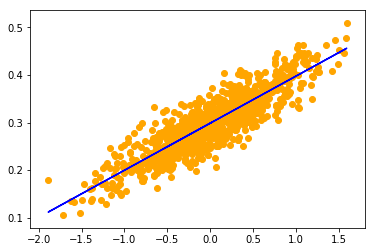

In [0]:

# 5.결과보기
print('w0: {}, w1: {}, \ndw0:{}, dw1: {}, \nMSE: {}'.format(w0,w1,dw0,dw1,MSE))
plt.plot(xs, xs*w1+w0, c='blue')
plt.scatter(xs, ys, c='orange')
plt.show()

#### 정답 확인
* 아래와 같이 출력이 나오도록 해주세요

![Imgur](https://i.imgur.com/zEiW7zM.png)